In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,max_salary,avg_salary,company_txt,job_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,Employer Provided Salary:$75 Per Hour,Position Title: Newborn Screening Data Scienti...,3.2,Info Origin Inc.\r\n3.2,Remote,1 to 50 Employees,-1,Company - Private,-1,...,75,75.0,Info Origin Inc.\r\n,-1,-1,0,0,0,0,0
1,Data Scientist,Employer Provided Salary:$120K - $250K,Company Overview:\r\nParabolic is a career coa...,-1.0,Parabolic USA,"New York, NY",Unknown,-1,Company - Public,-1,...,250,185.0,Parabolic USA,NY,-1,0,0,0,0,0
2,Data Scientist,Employer Provided Salary:$80 - $100 Per Hour,Heavy financial experience\r\nSQL\r\nBe able t...,-1.0,Intuitive Cloud,Remote,-1,-1,-1,-1,...,100,90.0,Intuitive Cloud,-1,-1,1,0,0,0,0
3,Data Scientist,$90K - $126K (Glassdoor est.),Job Overview\r\nCalling all foodie techies! We...,3.5,Chowbus\r\n3.5,"Chicago, IL",51 to 200 Employees,2016,Company - Private,Internet & Web Services,...,126,108.0,Chowbus\r\n,IL,4,0,0,0,0,0
4,Data Scientist,$75K - $114K (Glassdoor est.),PLEASE NOTE: The clients would like recruiting...,4.8,NR Consulting LLC\r\n4.8,"Taylorsville, UT",201 to 500 Employees,2017,Company - Private,Information Technology Support Services,...,114,94.5,NR Consulting LLC\r\n,UT,3,1,0,0,1,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist    958
na                 13
analyst             2
data engineer       1
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        893
jr         64
senior     17
Name: seniority, dtype: int64

In [9]:
# Fix state Los Angeles 
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

-1    303
NY    174
CA    111
UT    106
WA     72
MA     36
GA     30
WI     28
CT     26
NC     22
IA     22
NJ     11
VA     10
OH      8
MD      4
NV      4
IL      3
MT      2
TX      1
DC      1
Name: job_state, dtype: int64

In [10]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       571
1       758
2       264
3       674
4      1231
       ... 
969     758
970     191
971    2353
972     978
973     345
Name: desc_len, Length: 974, dtype: int64

In [11]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [12]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
0,1,150,150
2,1,160,200
7,1,90,100
9,1,180,210
10,1,160,180
12,1,140,160
19,1,170,170
22,1,90,100


In [13]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\r', ''))

In [14]:
df['company_txt']

0                           Info Origin Inc.
1                              Parabolic USA
2                            Intuitive Cloud
3                                    Chowbus
4                          NR Consulting LLC
                       ...                  
969                            Parabolic USA
970    Pacific Northwest National Laboratory
971                                     Bose
972                       American Red Cross
973                                  Spotify
Name: company_txt, Length: 974, dtype: object

In [15]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,desc_len
count,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.0,974.000000,974.000000,974.000000,974.000000
mean,3.139938,1488.149897,0.008214,0.017454,73.683778,144.952772,108.699692,39.843943,0.213552,0.0,0.021561,0.099589,0.035934,1010.707392
std,1.886975,846.094877,0.090302,0.131022,8.863276,21.996025,12.879747,50.682741,0.410025,0.0,0.145318,0.299605,0.186222,955.143503
min,-1.000000,-1.000000,0.000000,0.000000,55.000000,60.000000,47.500000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,49.000000
25%,3.200000,1831.000000,0.000000,0.000000,73.000000,152.000000,112.500000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,503.000000
50%,3.900000,1964.000000,0.000000,0.000000,73.000000,152.000000,112.500000,16.000000,0.000000,0.0,0.000000,0.000000,0.000000,765.000000
75%,4.200000,2006.000000,0.000000,0.000000,73.000000,152.000000,112.500000,56.000000,0.000000,0.0,0.000000,0.000000,0.000000,1161.000000
max,4.900000,2019.000000,1.000000,1.000000,180.000000,250.000000,185.000000,221.000000,1.000000,0.0,1.000000,1.000000,1.000000,5703.000000


In [16]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

<AxesSubplot:>

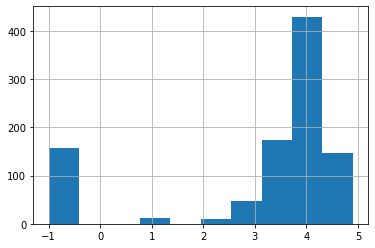

In [17]:
df.Rating.hist()

<AxesSubplot:>

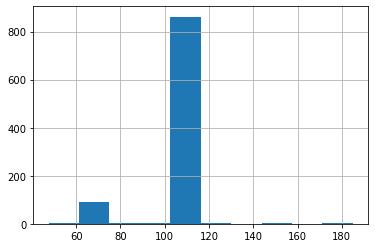

In [18]:
df.avg_salary.hist()

<AxesSubplot:>

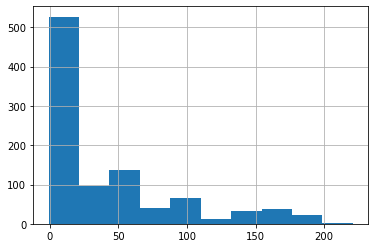

In [19]:
df.age.hist()

<AxesSubplot:>

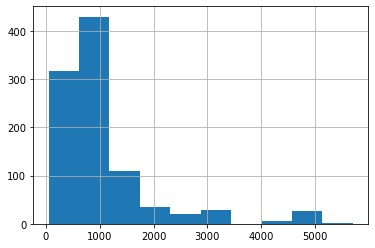

In [20]:
df.desc_len.hist()

<AxesSubplot:>

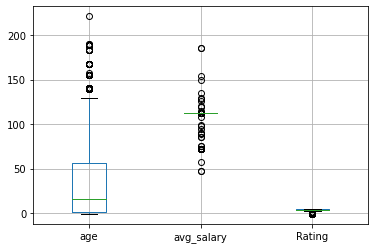

In [21]:
df.boxplot(column = ['age','avg_salary','Rating'])

<AxesSubplot:>

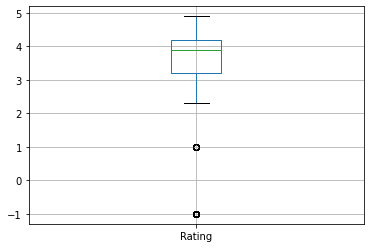

In [22]:
df.boxplot(column = 'Rating')

In [23]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,-0.096551,0.345111,0.374922
avg_salary,-0.096551,1.000000,-0.012552,-0.021342
Rating,0.345111,-0.012552,1.000000,0.068768
desc_len,0.374922,-0.021342,0.068768,1.000000


<AxesSubplot:>

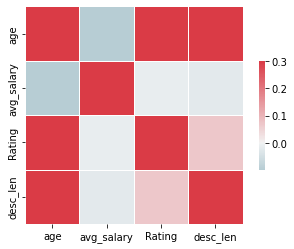

In [24]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=0.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [26]:
df_cat = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority']]

graph for Location: total = 46


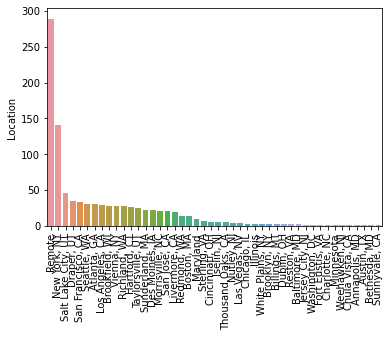

graph for Size: total = 9


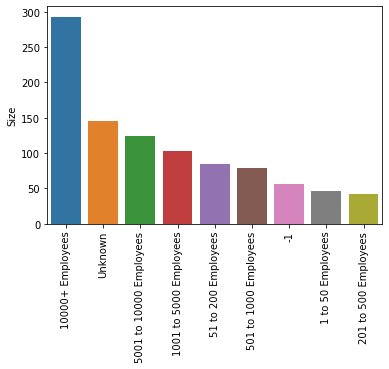

graph for Type of ownership: total = 8


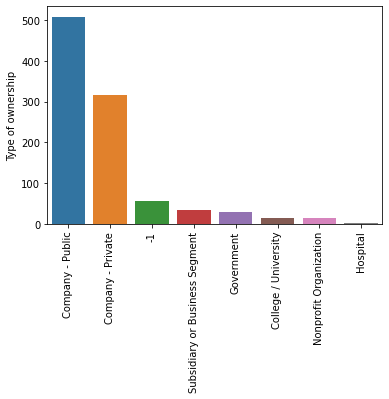

graph for Industry: total = 35


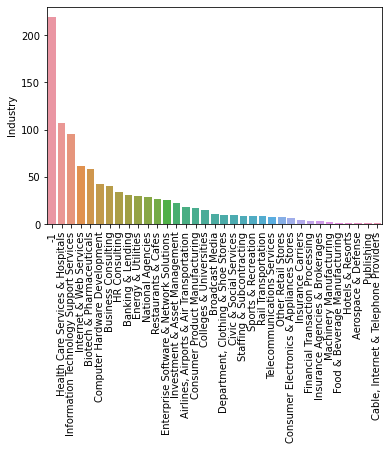

graph for Sector: total = 21


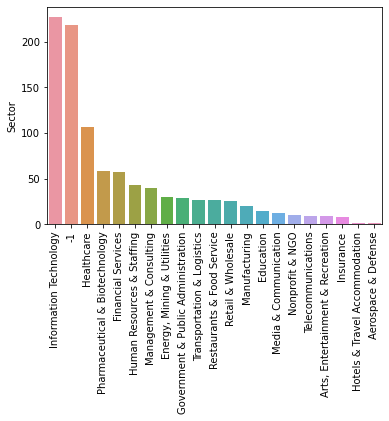

graph for Revenue: total = 11


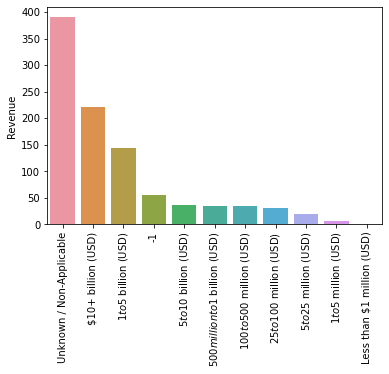

graph for company_txt: total = 100


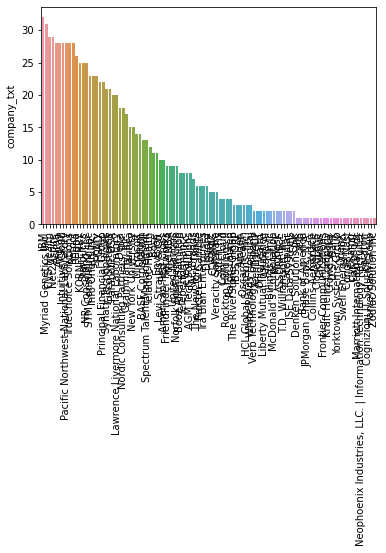

graph for job_state: total = 20


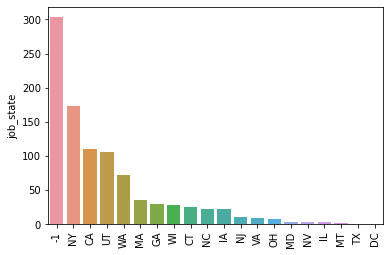

graph for python_yn: total = 2


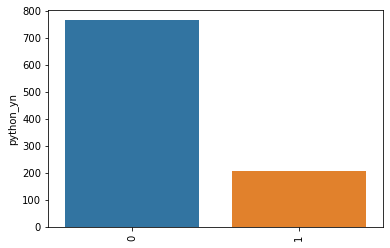

graph for R_yn: total = 1


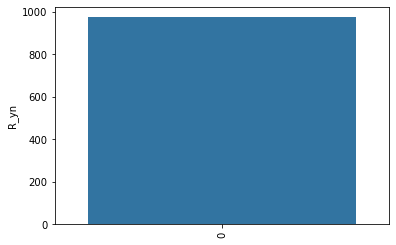

graph for spark_yn: total = 2


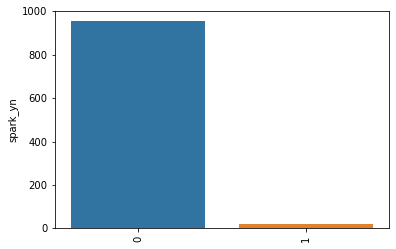

graph for aws_yn: total = 2


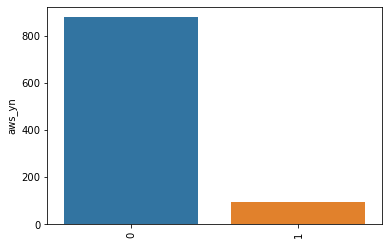

graph for excel_yn: total = 2


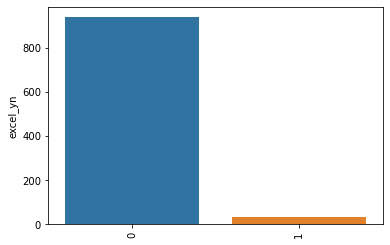

graph for job_simp: total = 4


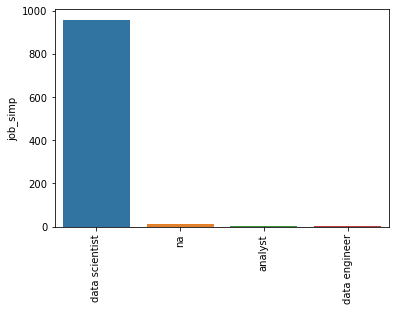

graph for seniority: total = 3


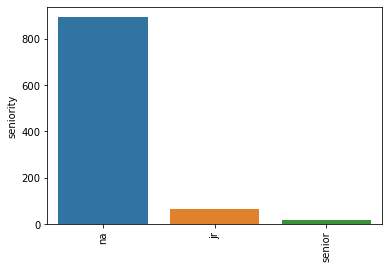

In [27]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


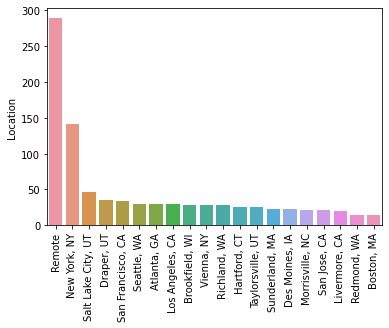

graph for company_txt: total = 20


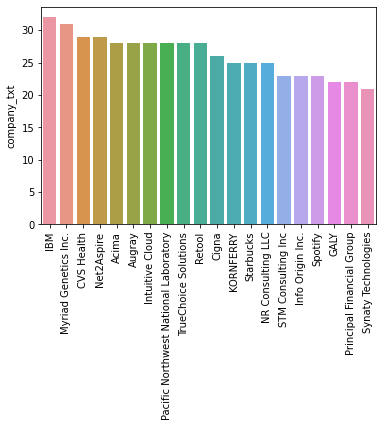

In [28]:
for i in df_cat[['Location','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [29]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [30]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,112.500000
data engineer,112.500000
data scientist,108.762004
na,103.230769


In [31]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        na         112.500000
data engineer  na         112.500000
data scientist jr         109.359375
               na         108.769669
               senior     106.117647
na             na         103.230769

In [32]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        data scientist  109.089286
WA        na              101.071429
          data scientist  109.669231
VA        data scientist  104.450000
UT        data scientist  110.433962
TX        data scientist   72.500000
OH        na              105.750000
          data scientist  100.500000
NY        data scientist  109.597701
NV        data scientist  112.500000
NJ        data scientist   97.954545
NC        data scientist  110.681818
MT        data scientist   92.500000
MD        data scientist   92.500000
MA        data scientist  110.277778
IL        data scientist  110.833333
IA        data scientist  110.659091
GA        data scientist  108.466667
DC        data engineer   112.500000
CT        data scientist  110.442308
CA        analyst         112.500000
          data scientist  108.743119
-1        data scientist  107.867987

In [33]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [34]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        data scientist          28
WA        na                       7
          data scientist          65
VA        data scientist          10
UT        data scientist         106
TX        data scientist           1
OH        na                       6
          data scientist           2
NY        data scientist         174
NV        data scientist           4
NJ        data scientist          11
NC        data scientist          22
MT        data scientist           2
MD        data scientist           4
MA        data scientist          36
IL        data scientist           3
IA        data scientist          22
GA        data scientist          30
DC        data engineer            1
CT        data scientist          26
CA        analyst                  2
          data scientist         109
-1        data scientist         303

In [35]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
NV,112.500000
IL,110.833333
NC,110.681818
IA,110.659091
CT,110.442308
UT,110.433962
MA,110.277778
WA,109.669231
NY,109.597701


In [36]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of onwership, 'avg_salary',
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Type of ownership', 'avg_salary',]]

In [37]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [38]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 1.0    112.500000
 4.8    111.311475
 3.2    111.250000
 4.7    110.117647
 4.3    110.007353
 3.5    109.600000
 3.6    109.290000
 4.5    109.280000
-1.0    109.237179
 4.1    108.714286
 4.2    108.703704
 4.0    108.672414
 3.8    108.426471
 3.7    108.378378
 3.0    107.895349
 4.4    105.965116
 3.9    104.593750
 2.3    103.555556
 3.4     96.500000
 3.1     96.500000
 4.9     72.500000
Industry
                                          avg_salary
Industry                                            
Financial Transaction Processing          112.500000
Cable, Internet & Telephone Providers     112.500000
Publishing                                112.500000
Consumer Electronics & Appliances Stores  112.500000
HR Consulting                             111.691176
Enterprise Software & Network Solutions   110.923077
Investment & Asset Management             110.659091
Internet & Web Services                   110.524194
Business Consulti

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [39]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $5 billion (USD),143.0,NaN
$1 to $5 million (USD),6.0,NaN
$10+ billion (USD),193.0,29.0
$100 to $500 million (USD),9.0,26.0
$25 to $100 million (USD),17.0,13.0
$5 to $10 billion (USD),36.0,1.0
$5 to $25 million (USD),11.0,8.0
$500 million to $1 billion (USD),35.0,NaN
-1,26.0,30.0


In [40]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [41]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(interpolation="bilinear")
plt.axis('off')
plt.show()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\gwena/nltk_data'
    - 'C:\\Users\\gwena\\anaconda3\\nltk_data'
    - 'C:\\Users\\gwena\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\gwena\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\gwena\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [42]:
df.to_csv('eda_data.csv', index = False)